## Real Estate - Price Predictor

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv("data.csv")
housing.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            410 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
housing['X1 transaction date'].value_counts()

X1 transaction date
2013.417    58
2013.500    47
2013.083    46
2012.917    38
2013.250    32
2012.833    31
2012.667    30
2013.333    29
2013.000    28
2012.750    27
2013.167    25
2013.583    23
Name: count, dtype: int64

In [5]:
housing.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,410.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.786341,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.298859,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.250000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.150000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'No'}>,
        <Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>],
       [<Axes: title={'center': 'X3 distance to the nearest MRT station'}>,
        <Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>],
       [<Axes: title={'center': 'X6 longitude'}>,
        <Axes: title={'center': 'Y house price of unit area'}>, <Axes: >]],
      dtype=object)

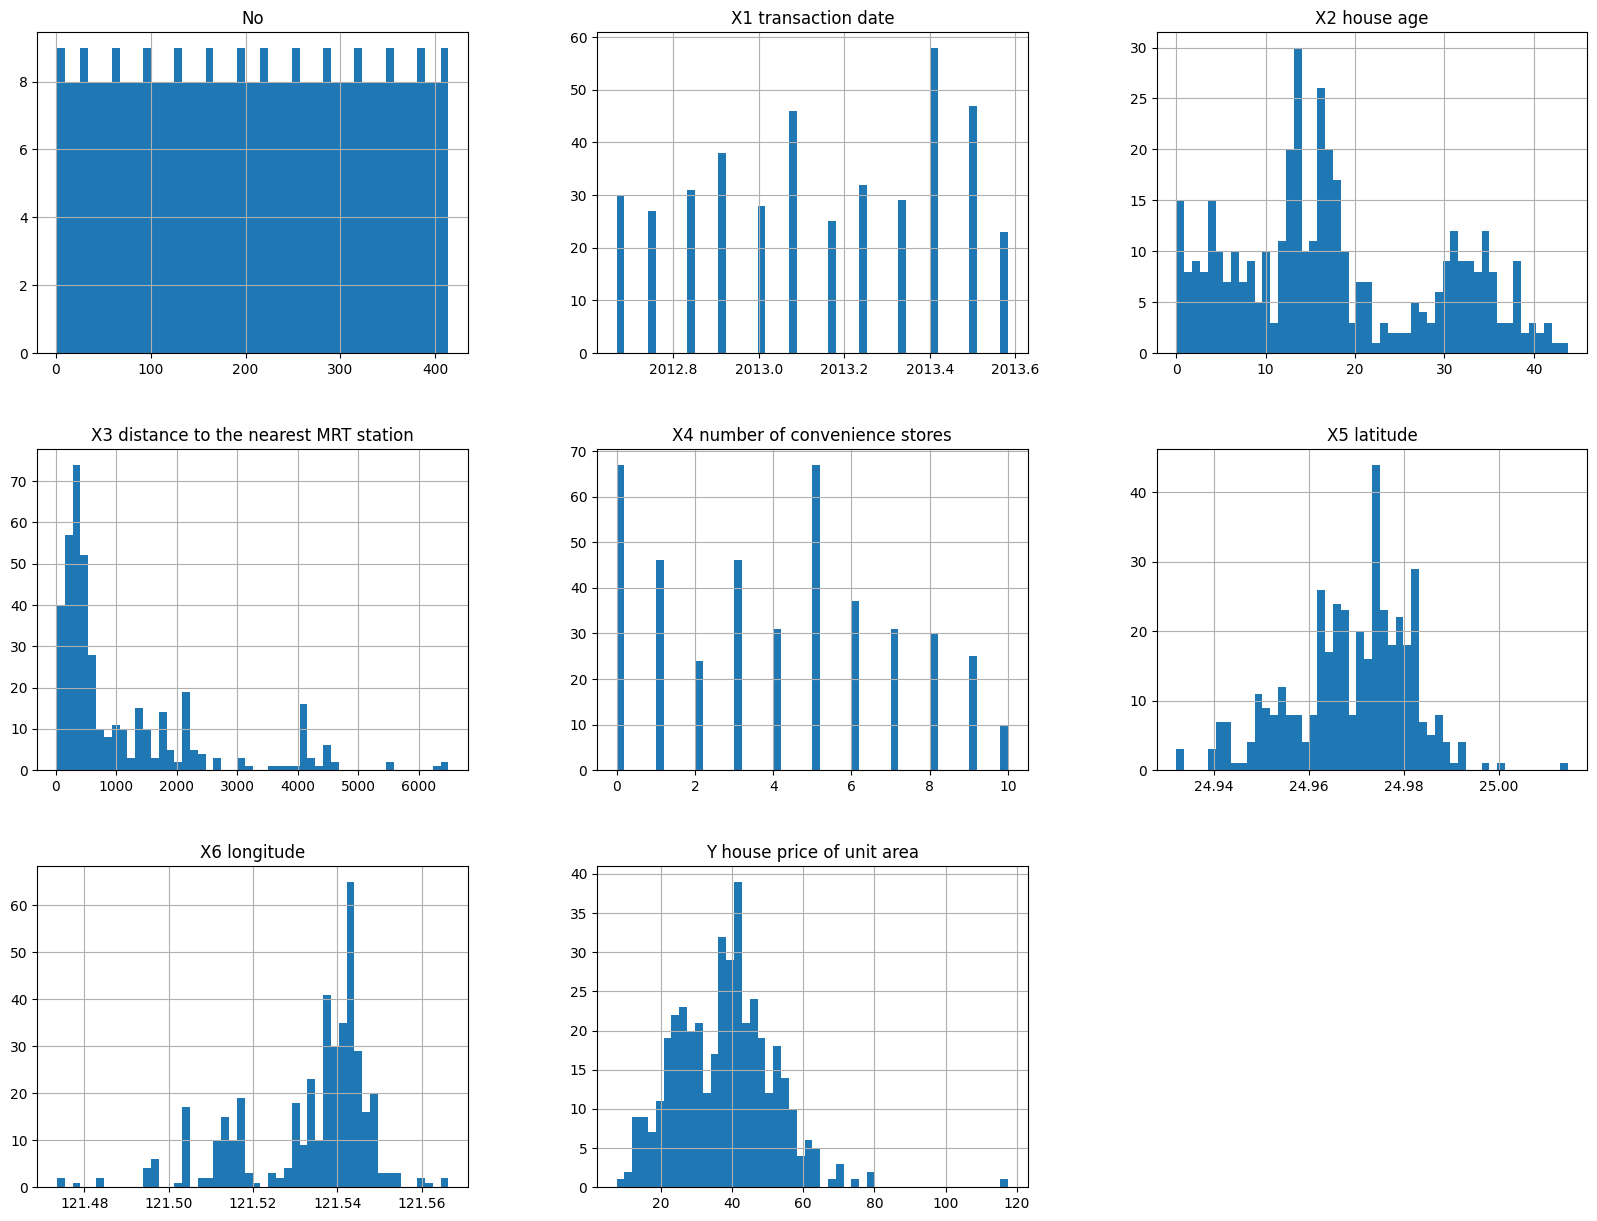

In [8]:
housing.hist(bins = 50, figsize=(20, 15))

## Train Test Splitting

In [9]:
#def split_train_test(data, test_ratio):
    # np.random.seed(42)
    # shuffled = np.random.permutation(len(data))
    # test_set_size = int(len(data) * test_ratio)
    # test_indices = shuffled[:test_set_size]
    # train_indices = shuffled[test_set_size:]
    # return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")


In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [13]:
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")


Rows in train set: 331
Rows in test set: 83



In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['X1 transaction date']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]    

In [15]:
strat_test_set['X1 transaction date'].value_counts()

X1 transaction date
2013.417    12
2013.083     9
2013.500     9
2012.917     8
2013.333     6
2012.833     6
2013.000     6
2013.250     6
2012.667     6
2012.750     5
2013.167     5
2013.583     5
Name: count, dtype: int64

In [16]:
strat_train_set['X1 transaction date'].value_counts()

X1 transaction date
2013.417    46
2013.500    38
2013.083    37
2012.917    30
2013.250    26
2012.833    25
2012.667    24
2013.333    23
2013.000    22
2012.750    22
2013.167    20
2013.583    18
Name: count, dtype: int64

## Looking for correlations

In [17]:
corr_matrix = housing.corr()

In [18]:
corr_matrix['Y house price of unit area'].sort_values(ascending=False)

Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087491
No                                       -0.028587
X2 house age                             -0.200777
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64

array([[<Axes: xlabel='Y house price of unit area', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>,
        <Axes: xlabel='X2 house age', ylabel='Y house price of unit area'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X3 distance to the nearest MRT station'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='X3 distance to the nearest MRT station'>,
        <Axes: xlabel='X2 house age', ylabel='X3 distance to the nearest MRT station'>],
       [<Axes: xlabel='Y house price of unit area', ylabel='X2 house age'>,
        <Axes: xlabel='X3 distance to the nearest MRT station', ylabel='X2 house age'>,
        <Axes: xlabel='X2 house age', ylabel='X2 house age'>]],
      dtype=object)

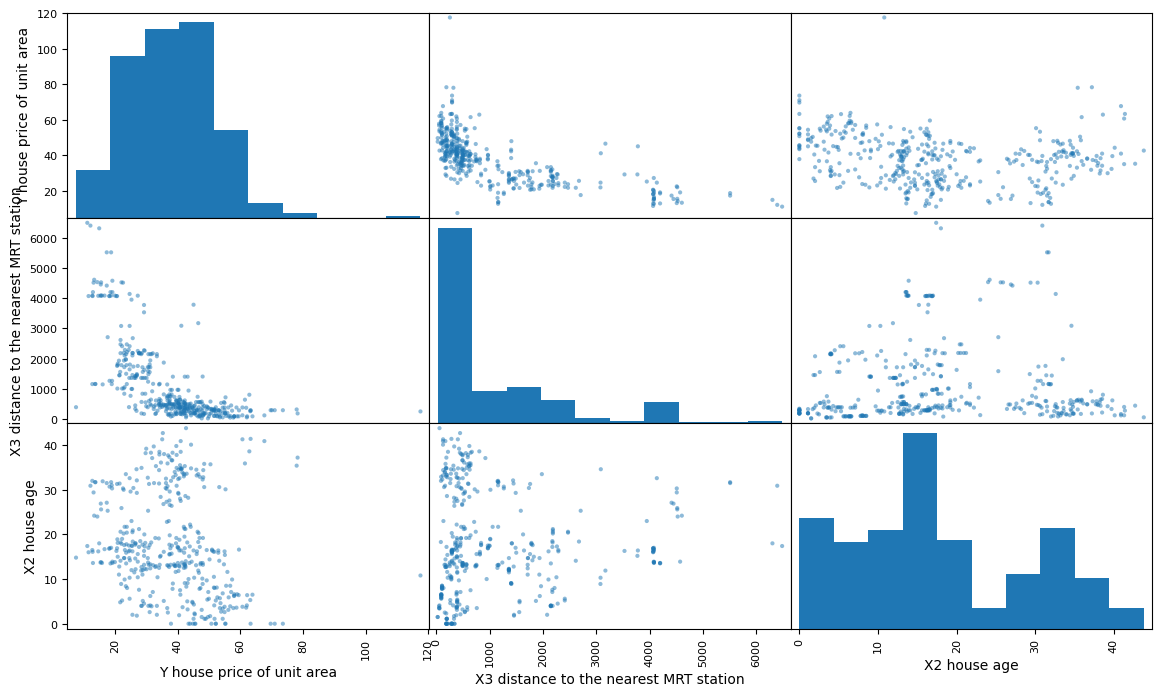

In [19]:
from pandas.plotting import scatter_matrix
attributes = ['Y house price of unit area', 'X3 distance to the nearest MRT station', 'X2 house age']
scatter_matrix(housing[attributes], figsize=(14,8))

<Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

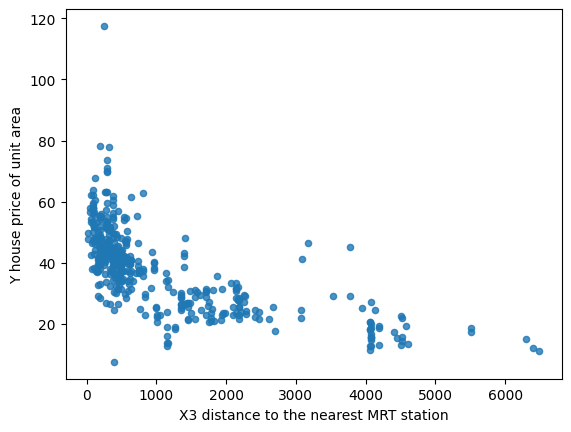

In [20]:
housing.plot(kind='scatter', x='X3 distance to the nearest MRT station', y='Y house price of unit area', alpha=0.8)

## Trying out Attribute Combination

In [21]:
housing = strat_train_set.drop("Y house price of unit area", axis=1)
housing_labels = strat_train_set["Y house price of unit area"].copy()

## Missing Attributes

To take care of missing attributes, you have three options:

    1. Get rid of the missing data points
    
    2. Get rid of the whole attribute
    
    3. Set the value to some value(0, mean or median)

In [22]:
median = housing['X2 house age'].median()
housing['X2 house age'].fillna(median)

24     16.1
391     6.2
278     0.0
67      8.5
411    18.8
       ... 
337    31.3
52     32.1
71     35.5
325    36.6
225     1.1
Name: X2 house age, Length: 331, dtype: float64

In [23]:
housing.shape

(331, 7)

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [25]:
imputer.statistics_

array([ 205.     , 2013.167  ,   16.1    ,  535.527  ,    4.     ,
         24.9711 ,  121.53788])

In [26]:
X = imputer.transform(housing)


In [27]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [28]:
housing_tr.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,207.773414,2013.148305,17.788520,1098.354193,3.921450,24.968961,121.533457
std,121.311495,0.282119,11.321384,1228.384528,2.960322,0.012553,0.015181
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932930,121.473530
25%,100.000000,2012.917000,9.050000,292.997800,1.000000,24.962990,121.527600
50%,205.000000,2013.167000,16.100000,535.527000,4.000000,24.971100,121.537880
75%,317.500000,2013.417000,28.850000,1455.798000,6.000000,24.977705,121.543480
max,414.000000,2013.583000,41.400000,6488.021000,10.000000,25.014590,121.566270


## Scikit-Learn Design

Primarily thre types of objects:
    
    1. Estimators - Estimates some parameters based on a dataset. 
    Ex- Imputer
    It has a fit method and transform method.
    
    Fit Method: Fits the dataset and calculates internal parameters
    
    
    2. Transformers: Transform method takes input and returns output based on the learnings from fit(). It also has a convinience function called fit_transform() which fits and then transforms. 
    
    3. Predictors: LinearRegression Model is an example of predictor. 
    fit() and predict are two common functions. It also gives score function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling:

1. Min-Max scaling (Normalization)

    (value-min)/(max-min)
    
    Sklearn provides a class called MinMaxScaler for this

2. Standardization 
    
    (value-mean)/(std)
    
    Sklearn provides a class called StandardScaler for this
    

## Creating a Pipeline

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    
    ('std_scaler', StandardScaler())
])

In [30]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [31]:
housing_num_tr

array([[-1.50892654, -0.52647856, -0.14937008, ...,  0.02657439,
         0.36450366,  0.3557868 ],
       [ 1.52092352,  1.54315307, -1.02514536, ..., -0.98836307,
        -1.38907548,  1.34665405],
       [ 0.58802691, -1.41397069, -1.57361068, ...,  0.70319937,
        -1.01969097,  0.32873916],
       ...,
       [-1.12090759, -0.23183118,  1.56679562, ..., -0.31173809,
         0.53204307,  0.24363804],
       [ 0.97604585, -0.23183118,  1.66410399, ...,  1.37982434,
         0.094845  ,  0.75754323],
       [ 0.15047363,  0.36101356, -1.47630232, ...,  0.70319937,
        -0.25938118,  0.49036531]])

In [32]:
housing_num_tr.shape

(331, 7)

## Selection a desired model for Real Estates

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [34]:
some_data = housing.iloc[:5]

In [35]:
some_labels = housing_labels.iloc[:5]

In [36]:
prepared_data = my_pipeline.transform(some_data)

In [37]:
model.predict(prepared_data)

array([39.069, 29.333, 45.252, 55.515, 40.466])

In [38]:
list(some_labels)

[38.8, 31.3, 44.0, 56.8, 40.6]

In [39]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [40]:
rmse # overfitting

3.028999404547524

### Using better evaluation technique - Cross validation


In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [42]:
rmse_scores

array([14.65692231,  8.00760113,  7.69001121,  6.10876061,  3.89218871,
        5.52965056,  8.38108581,  9.8536227 ,  6.10340133,  6.00614294])

In [43]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [44]:
print_scores(rmse_scores)

Scores:  [14.65692231  8.00760113  7.69001121  6.10876061  3.89218871  5.52965056
  8.38108581  9.8536227   6.10340133  6.00614294]
Mean:  7.622938730896427
Standard deviation:  2.8407082887593793


## saving the model

In [45]:
from joblib import dump, load
dump(model, "HousePred.joblib")

['HousePred.joblib']

## Testing the model on test data

In [49]:
X_test = strat_test_set.drop("Y house price of unit area", axis=1)
Y_test = strat_test_set["Y house price of unit area"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [50]:
final_rmse

6.549809263294782

In [52]:
print(final_predictions)

print(list(Y_test))

[16.598 39.812 36.622 16.094 40.41  39.455 57.44  54.39  41.601 40.722
 33.063 46.201 59.08  43.656 44.999 25.512 39.796 20.044 50.098 47.378
 43.092 41.878 48.655 46.245 50.574 57.665 15.789 41.673 41.912 50.08
 45.838 44.494 38.82  24.969 54.091 25.828 55.999 27.615 42.192 47.252
 32.191 58.738 16.515 37.806 25.424 48.383 47.14  39.621 48.027 59.011
 47.412 41.488 41.853 48.243 49.591 17.555 43.222 36.471 25.863 16.938
 47.131 25.663 34.156 37.165 48.661 47.467 28.145 54.387 46.99  62.002
 45.233 26.501 38.482 20.19  19.973 46.904 19.363 47.855 30.19  38.83
 36.19  39.988 51.945]
[14.4, 40.6, 34.1, 15.0, 42.2, 40.2, 45.5, 43.5, 30.0, 40.9, 24.5, 41.4, 62.2, 46.6, 48.2, 27.7, 40.8, 18.3, 42.8, 33.6, 42.3, 39.3, 45.4, 35.3, 57.4, 58.1, 13.2, 44.3, 40.2, 55.9, 53.0, 50.7, 48.0, 30.7, 56.3, 23.2, 44.9, 27.7, 43.4, 43.2, 30.5, 71.0, 17.4, 42.3, 20.9, 52.2, 47.4, 35.5, 52.5, 59.0, 45.1, 47.0, 42.0, 70.1, 51.0, 16.7, 53.3, 40.6, 21.3, 12.8, 55.0, 24.8, 29.3, 36.8, 35.1, 47.1, 30.8, 41.0, 46

In [54]:
prepared_data[3]

array([-1.15393048,  1.24850569, -0.82168241, -0.81004629,  0.36488688,
       -0.17720709,  0.47585194])